# <span style="color:blue"> NSL Exercise lesson 11. </span> 

## <span style="color:red"> Exercise 11.1. </span>

The goal of this lesson is making practice with neural networks. Therefore, this first exercise requires to explore how a linear regression depend on the specific parameters of the NN, i.e. the number of epochs $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and the noise $\sigma$. 

The following script exploits three for loops in order to change such parameters. Then, it draws the results given by the neural network and compares them with the expected trend of the function $f(x)=2x+1$.

Note: in order to allow the system to find the best result rather quickly, it was chosen to use only three different values for each parameter, but you can change them as you want adding new ones.

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense as Dense
import matplotlib.pyplot as plt
import numpy as np

Best parameters: σ = 0.1 , Epoch = 50 , Train = 500


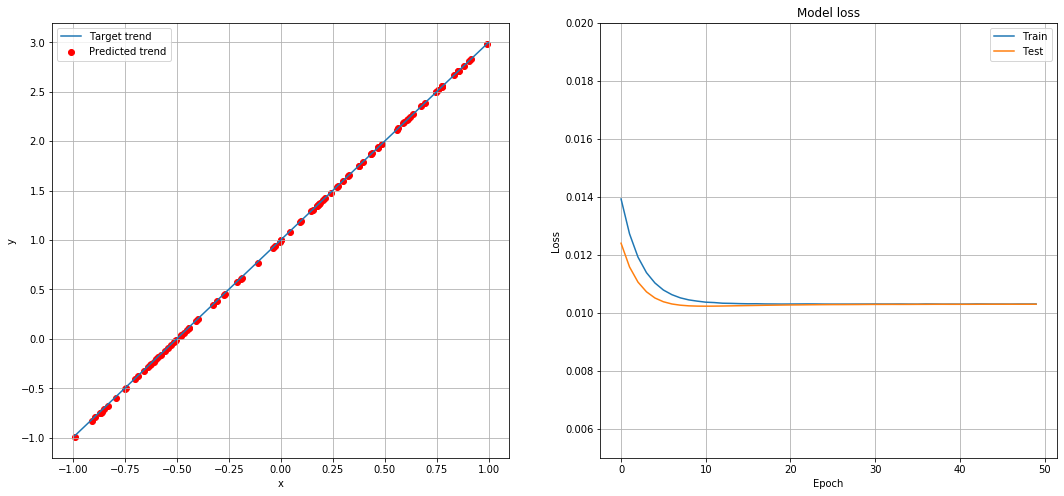

In [33]:
# Parameters of f(x) = m*x + b
m = 2
b = 1

# Generate training inputs
np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 250)
x_valid.sort()
y_target = m * x_valid + b

# NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# You can change the following parameters as you want
Sigma = [0.1, 0.2, 0.5]                                    # Noise standard deviation
Epoch = [10, 20, 50]                                       # Number of epochs per stdev
Train = [10, 100, 500]                                     # Number of datas to train NN

best_loss = 1000

# Simulation over different parameters
for sigma in Sigma:
    for epoch in Epoch:
        for train in Train:
            x_train = np.random.uniform(-1, 1, train)        
            y_train = np.random.normal(m * x_train + b, sigma) 
            y_valid = np.random.normal(m * x_valid + b, sigma)

            history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epoch, 
                                shuffle=True, validation_data=(x_valid, y_valid), verbose=False)
            
            if(history.history['val_loss'][-1] < best_loss):
                best_loss=history.history['val_loss'][-1]
                best_sigma, best_epoch, best_train = sigma, epoch, train

y_train = np.random.normal(m * x_train + b, best_sigma)
y_valid = np.random.normal(m * x_valid + b, best_sigma)

history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=best_epoch,
                    shuffle=True, validation_data=(x_valid, y_valid), verbose=False)

# Best parameters
print("Best parameters: \u03C3 =", best_sigma, ", Epoch =", best_epoch, ", Train =", best_train)

# Plots
plt.figure(figsize = (18, 8))

plt.subplot(1, 2, 1)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', marker='o', label="Predicted trend")
plt.plot(x_valid, y_target, label="Target trend")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.005,0.02])
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

plt.show()

As one can expect, the neural network finds the best results when the noise $\sigma$ is low, while the number of epochs and training datas are high.

## <span style="color:red"> Exercise 11.2. </span>

Then, it is asked to extend the previous model in order to obtain a decent fit of the function 

$$ f(x)=4-3x-2x^2+3x^3 $$

for $x \in [-1,1]$.

The following script creates different kind of neural networks, increasing respectively the number of total layers and the number of total neurons per layer. Also, it was decided to use *selu* as activation function and stochastic gradient descent as optimizer. Finally, all NNs are trained on $N_{\mathrm{train}} = 1500$ data points distributed around $f(x)$ with a standard deviation $\sigma = 0.1$.

Number of layers = 5     Number of neurons per layer = 5


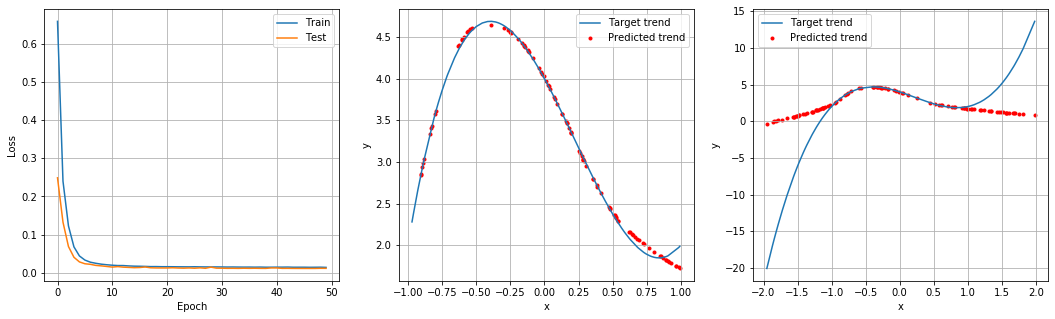

Number of layers = 5     Number of neurons per layer = 10


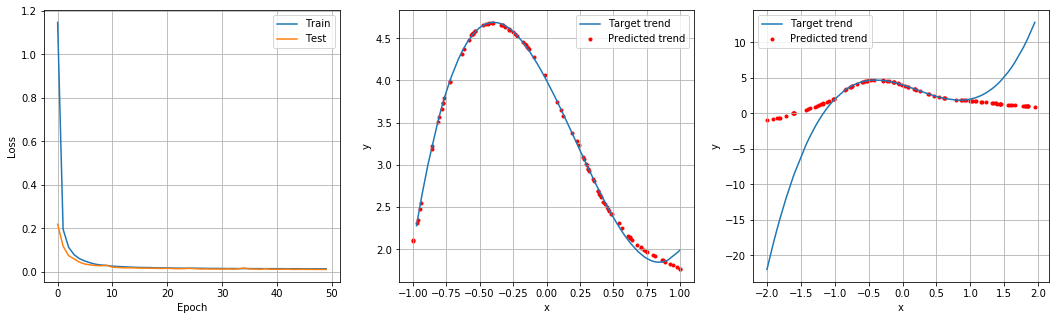

Number of layers = 5     Number of neurons per layer = 15


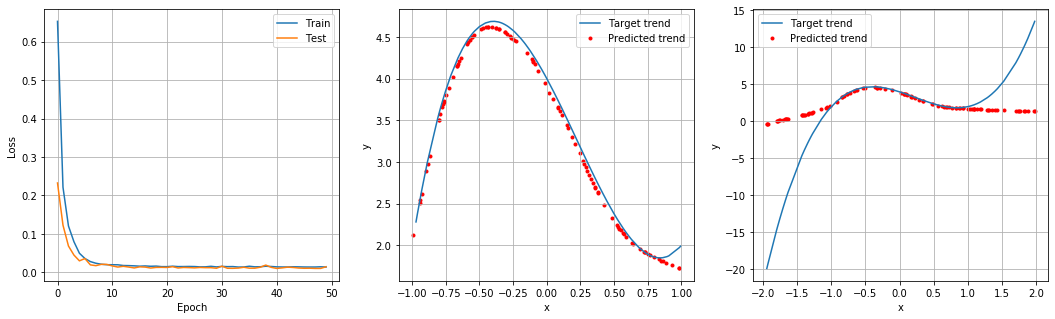

Number of layers = 10     Number of neurons per layer = 5


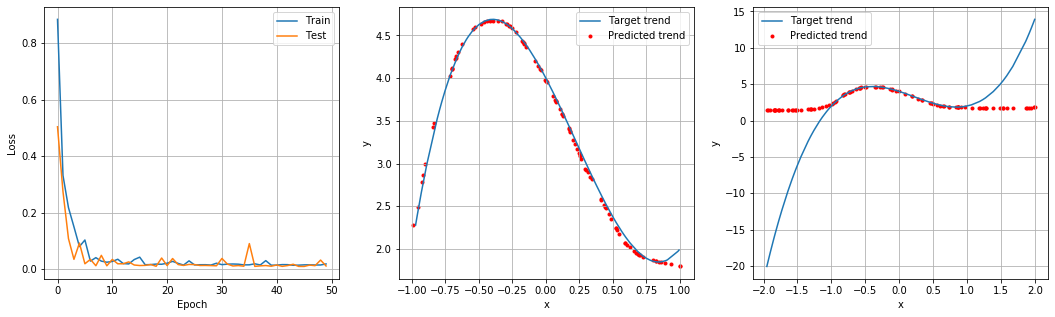

Number of layers = 10     Number of neurons per layer = 10


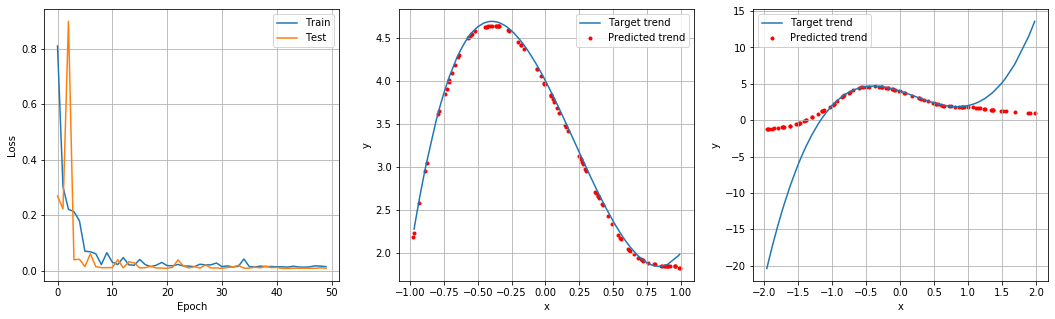

Number of layers = 10     Number of neurons per layer = 15


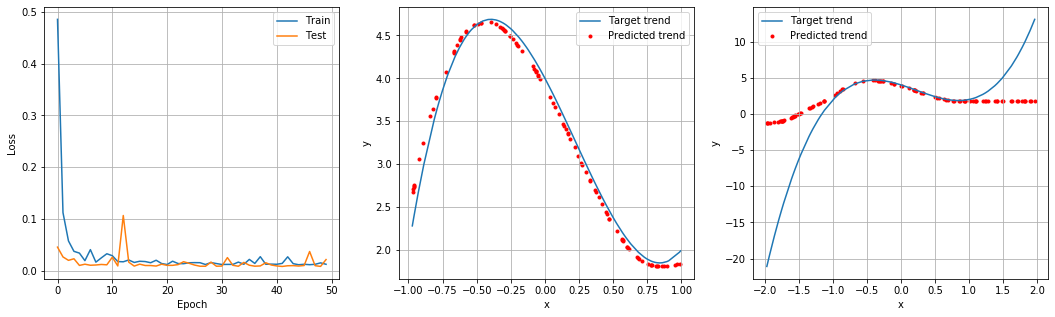

Number of layers = 15     Number of neurons per layer = 5


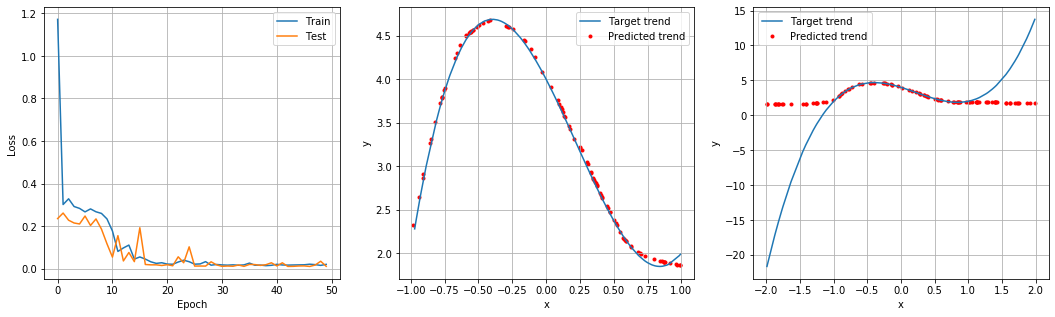

Number of layers = 15     Number of neurons per layer = 10


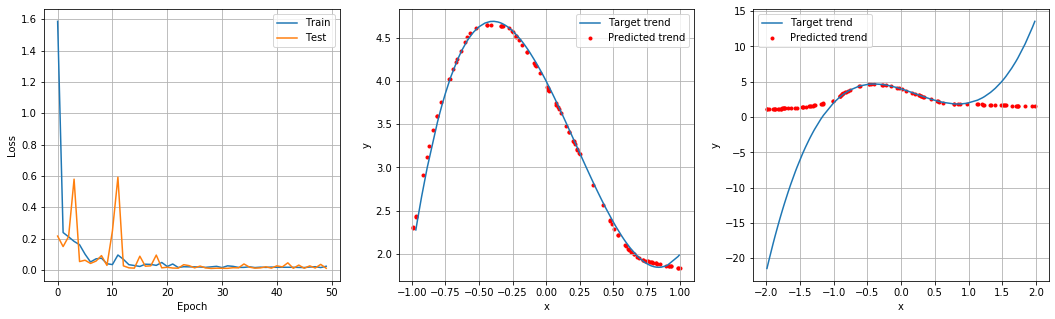

Number of layers = 15     Number of neurons per layer = 15


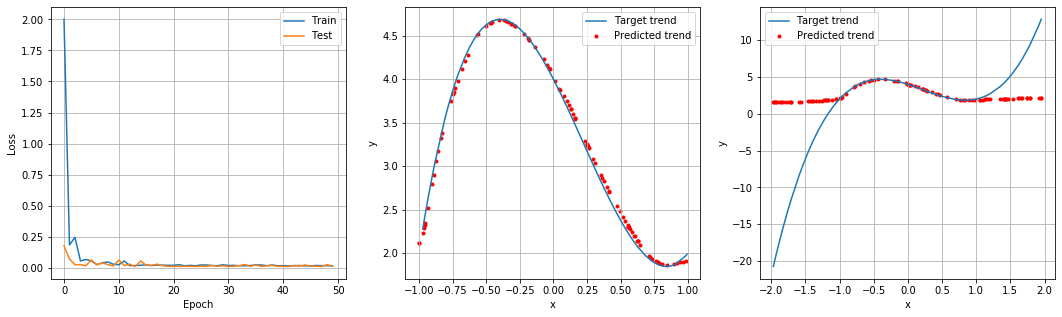

In [98]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# Noise standard deviation
sigma = 0.1

# Number of layers and neurons per each layer
Layers = [5, 10, 15]
Neurons = [5, 10, 15]

# Generate training inputs
x_train = np.random.uniform(-1, 1, 1500)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 3.*x_valid**3 - 2.*x_valid**2 - 3.*x_valid + 4.
y_train = np.random.normal(3.*x_train**3 - 2.*x_train**2 - 3.*x_train + 4., sigma)
y_valid = np.random.normal(3.*x_valid**3 - 2.*x_valid**2 - 3.*x_valid + 4., sigma)

i = 1

for nlayers in Layers:
    
    for neurons in Neurons:
        
        plt.figure(index, figsize = (18, 5))
        
        # NNs model
        model = tf.keras.models.Sequential()
        model.add(Dense(neurons, activation='selu', input_shape=(1,)))
        for i in range(1, nlayers - 1):
            model.add(Dense(neurons, activation='selu'))

        model.add(Dense(1, activation='selu'))    
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
        history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50 , shuffle=True, 
                            validation_data=(x_valid, y_valid), verbose=False)
            
        # Loss plot
        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Train', 'Test'], loc='best')
        plt.grid(True)

        # Trend plot inside [-1.,1.]
        plt.subplot(1, 3, 2)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted, color='r', marker='.', label="Predicted trend")
        plt.plot(x_valid, y_target, label="Target trend")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend()
        
        # Trend plot outside [-1.,1.]
        plt.subplot(1, 3, 3)
        x_outside_trend = np.random.uniform(-2, 2, 100)
        y_outside_trend = np.random.normal(3.*x_outside_trend**3 - 2.*x_outside_trend**2 - 3.*x_outside_trend + 4., sigma)
        x_outside_trend.sort()
        y_outside_target = 3.*x_outside_trend**3 - 2.*x_outside_trend**2 - 3.*x_outside_trend + 4.  
        y_predicted = model.predict(x_outside_trend)

        plt.scatter(x_outside_trend, y_predicted, color='r', marker='.', label="Predicted trend")
        plt.plot(x_outside_trend, y_outside_target, label="Target trend")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend()
        
        i+=1

        print("Number of layers =", nlayers,"    Number of neurons per layer =", neurons)

        plt.show()   

From all the plots above we can see two general behaviours:

- all neural networks are able to predict correct trends in the range $[-1,1]$ where they were trained
- all neural networks aren't able to determine the correct trend outside the training range $[-1,1]$

At the same time, we can say that all NNs work well when the number of layers and neurons isn't too high or too low. In fact, on one hand, it has been noted that 5 is the minimal number of layers and neurons needed to obtain a decent prediction of the target trend. Instead, on the other hand, 15 layers/neurons seem good upper bounds for all our neural networks. Indeed, you can try to increase/decrease the number of layers/neurons, but you should not expect to find decent results with the same number of training and validation datas, activation and optimizer functions. In other words, this means that the number of layers and neurons had been chosen in order to avoid any kind of underfitting or overfitting of datas.

## <span style="color:red"> Exercise 11.3. </span>

Finally, this last exercise requires to extend all previous models in order to fit a trigonometric 2D function, namely:

$$ f(x,y) = \sin(x^2+y^2) $$
 
where $x \in [-\frac{3}{2},\frac{3}{2}]$ and $y \in [-\frac{3}{2},\frac{3}{2}]$.

This time, it was decided to build the NN using 5 layers and 10 neurons per layer. Also, the NN works using $N_{\mathrm{train}} = 3000$, $N_{\mathrm{epochs}}=100$ and a noise of standard deviation $\sigma=0.1$. Below, you can find a plot of the loss function and a 3D plot of the trend predicted by the NN compared to the expected 'real' one.

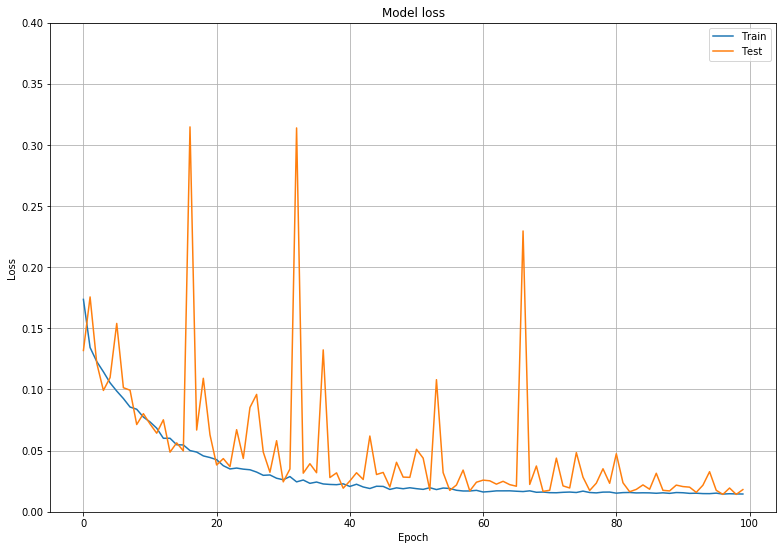

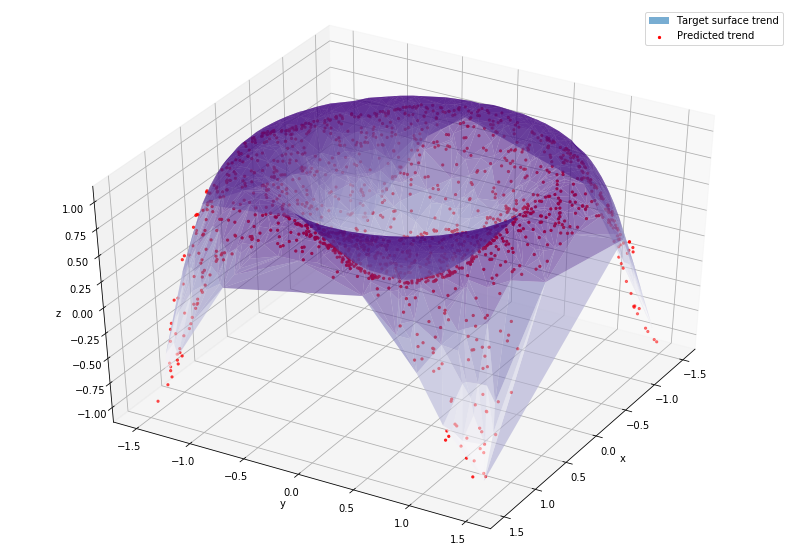

In [149]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Trigonometric function
def f(x,y):
    return np.sin(x**2 + y**2)

# Noise standard deviation
sigma = 0.1

# Number of layer and neurons per layer
layers = 5
neurons = 10

# Generate training inputs
x_train = np.random.uniform(-1.5, 1.5, 5000)
y_train = np.random.uniform(-1.5, 1.5, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 1000)
y_valid = np.random.uniform(-1.5, 1.5, 1000)
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

train = np.array([x_train, y_train]).T
valid = np.array([x_valid, y_valid]).T

# NN model
model = tf.keras.models.Sequential()
model.add(Dense(neurons, activation='selu', input_shape=(2,)))
for i in range(1, layers - 1):
    model.add(Dense(neurons, activation='selu'))    
model.add(Dense(1, activation='selu'))    
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
history = model.fit(x=train, y=z_train, batch_size=32, epochs=100 , shuffle=True, 
                    validation_data=(valid, z_valid), verbose=False)

# Loss plot
plt.figure(figsize = (13, 9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.4])
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

# 3D trend plot inside [-3/2, 3/2]
fig = plt.figure(figsize = (14, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x_valid, y_valid, f(x_valid, y_valid), cmap=cm.Purples, 
                       linewidth=0.1, antialiased=True, label='Target surface trend', alpha=0.6)
surf._facecolors2d = surf._facecolors3d
surf._edgecolors2d = surf._edgecolors3d

x_predicted = np.random.uniform(-1.5, 1.5, 1500)
y_predicted = np.random.uniform(-1.5, 1.5, 1500)
predicted = np.array([x_predicted, y_predicted]).T
z_predicted = model.predict(predicted)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', marker='.', label='Predicted trend')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40, 30)
ax.legend()

plt.show()